In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [13]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy


In [14]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


634

In [15]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [16]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=274f663cd266e6ddee18084900c75327"
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=274f663cd266e6ddee18084900c75327


In [17]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | katsuura
Processing Record 2 of Set 1 | severo-kurilsk
Processing Record 3 of Set 1 | carnarvon
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | bocaiuva
Processing Record 6 of Set 1 | sudzha
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | kihei
Processing Record 9 of Set 1 | cockburn town
Processing Record 10 of Set 1 | tasiilaq
Processing Record 11 of Set 1 | portland
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | hambantota
Processing Record 15 of Set 1 | khatanga
Processing Record 16 of Set 1 | salalah
Processing Record 17 of Set 1 | campo maior
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | mehamn
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of

Processing Record 37 of Set 4 | prince rupert
Processing Record 38 of Set 4 | angoche
Processing Record 39 of Set 4 | aviles
Processing Record 40 of Set 4 | olinda
Processing Record 41 of Set 4 | jieshi
Processing Record 42 of Set 4 | ponta do sol
Processing Record 43 of Set 4 | bandarbeyla
Processing Record 44 of Set 4 | vardo
Processing Record 45 of Set 4 | teya
Processing Record 46 of Set 4 | rock sound
Processing Record 47 of Set 4 | hlotse
Processing Record 48 of Set 4 | kaitangata
Processing Record 49 of Set 4 | sistranda
Processing Record 50 of Set 4 | mizan teferi
Processing Record 1 of Set 5 | weinan
Processing Record 2 of Set 5 | florida
Processing Record 3 of Set 5 | palmas bellas
Processing Record 4 of Set 5 | cape town
Processing Record 5 of Set 5 | bilibino
Processing Record 6 of Set 5 | songjianghe
Processing Record 7 of Set 5 | boende
Processing Record 8 of Set 5 | zhanakorgan
Processing Record 9 of Set 5 | guerrero negro
Processing Record 10 of Set 5 | jacareacanga
Pro

Processing Record 27 of Set 8 | krasnokamensk
Processing Record 28 of Set 8 | hualahuises
Processing Record 29 of Set 8 | pimentel
Processing Record 30 of Set 8 | sibolga
Processing Record 31 of Set 8 | xifeng
Processing Record 32 of Set 8 | chokurdakh
Processing Record 33 of Set 8 | termiz
Processing Record 34 of Set 8 | mormugao
Processing Record 35 of Set 8 | joao pessoa
Processing Record 36 of Set 8 | rio gallegos
Processing Record 37 of Set 8 | watertown
Processing Record 38 of Set 8 | cienaga de flores
City not found. Skipping...
Processing Record 39 of Set 8 | udala
Processing Record 40 of Set 8 | golden
Processing Record 41 of Set 8 | temaraia
City not found. Skipping...
Processing Record 42 of Set 8 | vila franca do campo
Processing Record 43 of Set 8 | redlands
Processing Record 44 of Set 8 | ko samui
Processing Record 45 of Set 8 | bowen
Processing Record 46 of Set 8 | lata
Processing Record 47 of Set 8 | guicheng
City not found. Skipping...
Processing Record 48 of Set 8 | c

Processing Record 10 of Set 12 | machinga
Processing Record 11 of Set 12 | lake city
Processing Record 12 of Set 12 | kudahuvadhoo
Processing Record 13 of Set 12 | timmins
Processing Record 14 of Set 12 | san andres
Processing Record 15 of Set 12 | lancaster
Processing Record 16 of Set 12 | boa vista
Processing Record 17 of Set 12 | hanna
Processing Record 18 of Set 12 | grindavik
Processing Record 19 of Set 12 | bayji
Processing Record 20 of Set 12 | yangambi
Processing Record 21 of Set 12 | poum
Processing Record 22 of Set 12 | haikou
Processing Record 23 of Set 12 | mecca
Processing Record 24 of Set 12 | sunrise manor
Processing Record 25 of Set 12 | fort nelson
Processing Record 26 of Set 12 | moron
Processing Record 27 of Set 12 | juba
Processing Record 28 of Set 12 | sulangan
Processing Record 29 of Set 12 | pochutla
Processing Record 30 of Set 12 | broome
Processing Record 31 of Set 12 | agadez
Processing Record 32 of Set 12 | champerico
Processing Record 33 of Set 12 | pedasi
P

In [19]:
len(city_data)


584

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Katsuura,35.1333,140.3000,78.19,73,68,16.40,JP,2021-09-25 00:40:17
1,Severo-Kurilsk,50.6789,156.1250,47.43,93,100,30.20,RU,2021-09-25 00:40:18
2,Carnarvon,-24.8667,113.6333,69.87,68,40,11.50,AU,2021-09-25 00:40:18
3,Bocaiuva,-17.1078,-43.8150,74.91,48,24,8.14,BR,2021-09-25 00:40:19
4,Sudzha,51.1976,35.2726,42.71,97,39,4.12,RU,2021-09-25 00:40:19
5,Kihei,20.7850,-156.4656,87.82,59,1,27.63,US,2021-09-25 00:40:19
6,Cockburn Town,21.4612,-71.1419,83.08,73,100,8.66,TC,2021-09-25 00:40:20
7,Tasiilaq,65.6145,-37.6368,30.92,85,98,7.07,GL,2021-09-25 00:40:20
8,Portland,45.5234,-122.6762,88.39,29,20,1.01,US,2021-09-25 00:40:20
9,Kodiak,57.7900,-152.4072,51.31,25,1,13.80,US,2021-09-25 00:40:21


In [21]:
# Reorder the columns in the order you want them to appear.
new_column_order = ["City", "Country", "Date", "Lat",
                    "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"] 

# Assign a new or the same DataFrame the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Katsuura,JP,2021-09-25 00:40:17,35.1333,140.3000,78.19,73,68,16.40
1,Severo-Kurilsk,RU,2021-09-25 00:40:18,50.6789,156.1250,47.43,93,100,30.20
2,Carnarvon,AU,2021-09-25 00:40:18,-24.8667,113.6333,69.87,68,40,11.50
3,Bocaiuva,BR,2021-09-25 00:40:19,-17.1078,-43.8150,74.91,48,24,8.14
4,Sudzha,RU,2021-09-25 00:40:19,51.1976,35.2726,42.71,97,39,4.12
5,Kihei,US,2021-09-25 00:40:19,20.7850,-156.4656,87.82,59,1,27.63
6,Cockburn Town,TC,2021-09-25 00:40:20,21.4612,-71.1419,83.08,73,100,8.66
7,Tasiilaq,GL,2021-09-25 00:40:20,65.6145,-37.6368,30.92,85,98,7.07
8,Portland,US,2021-09-25 00:40:20,45.5234,-122.6762,88.39,29,20,1.01
9,Kodiak,US,2021-09-25 00:40:21,57.7900,-152.4072,51.31,25,1,13.80


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
city_data_df.count()


City          584
Country       584
Date          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
dtype: int64

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

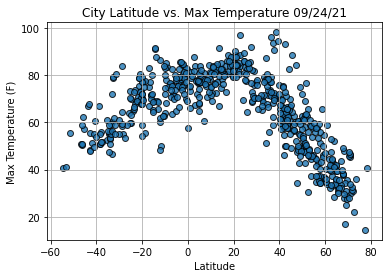

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

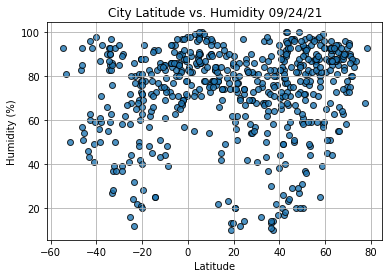

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

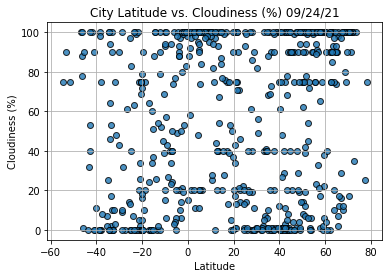

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

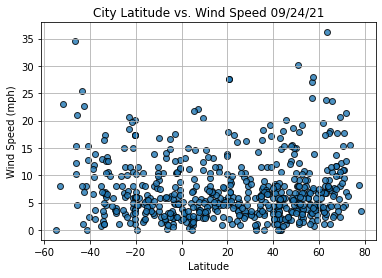

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [46]:
# Import linregress
from scipy.stats import linregress

In [47]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [48]:
index13 = city_data_df.loc[13]
index13

City                      Salalah
Country                        OM
Date          2021-09-25 00:40:22
Lat                       17.0151
Lng                       54.0924
Max Temp                    80.69
Humidity                       83
Cloudiness                     40
Wind Speed                   4.61
Name: 13, dtype: object

In [49]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4       True
       ...  
579     True
580     True
581     True
582     True
583     True
Name: Lat, Length: 584, dtype: bool

In [50]:
# Create Northern Hemisphere DataFrame
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Katsuura,JP,2021-09-25 00:40:17,35.1333,140.3000,78.19,73,68,16.40
1,Severo-Kurilsk,RU,2021-09-25 00:40:18,50.6789,156.1250,47.43,93,100,30.20
4,Sudzha,RU,2021-09-25 00:40:19,51.1976,35.2726,42.71,97,39,4.12
5,Kihei,US,2021-09-25 00:40:19,20.7850,-156.4656,87.82,59,1,27.63
6,Cockburn Town,TC,2021-09-25 00:40:20,21.4612,-71.1419,83.08,73,100,8.66


In [51]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Katsuura,JP,2021-09-25 00:40:17,35.1333,140.3000,78.19,73,68,16.40
1,Severo-Kurilsk,RU,2021-09-25 00:40:18,50.6789,156.1250,47.43,93,100,30.20
4,Sudzha,RU,2021-09-25 00:40:19,51.1976,35.2726,42.71,97,39,4.12
5,Kihei,US,2021-09-25 00:40:19,20.7850,-156.4656,87.82,59,1,27.63
6,Cockburn Town,TC,2021-09-25 00:40:20,21.4612,-71.1419,83.08,73,100,8.66


In [52]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

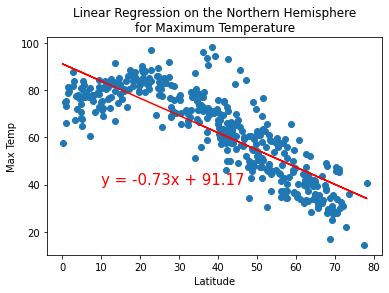

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 'Max Temp',(10,40))

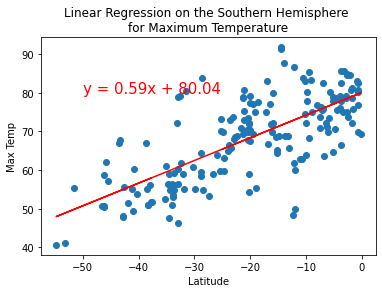

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,80))

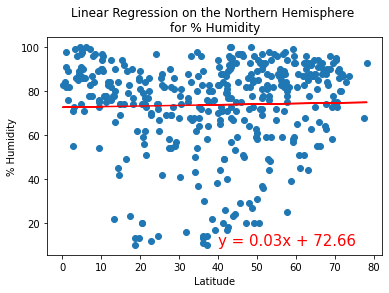

In [55]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity','% Humidity',(40,10))

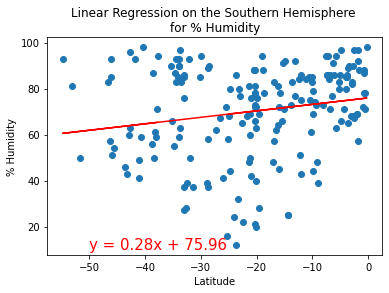

In [58]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity','% Humidity', (-50, 10))

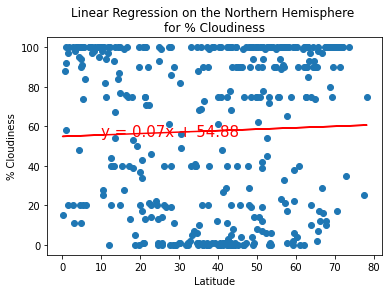

In [59]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness','% Cloudiness', (10, 55))

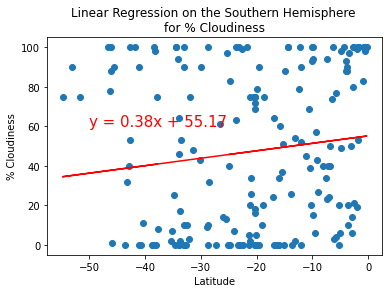

In [60]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness','% Cloudiness', (-50,60))

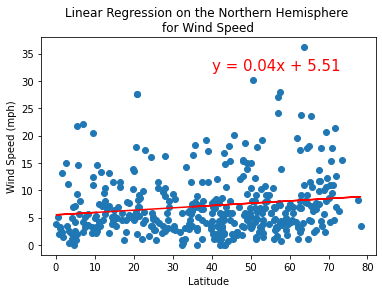

In [61]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed','Wind Speed (mph)', (40,32))

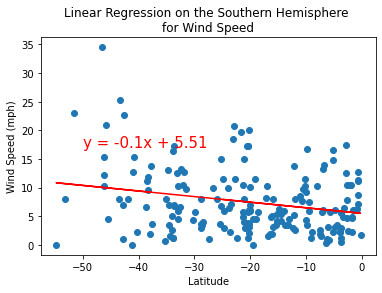

In [62]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed','Wind Speed (mph)', (-50,17))